In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

##### Open quality df produced by CheckM_plot.ipynb and the GTDB df's from GTDB_SanityCheck.ipynb

In [188]:
#Small datasets of 56 samples
df_quality = pd.read_csv('data56_related_files/Contamination_completness_df.csv')
df_Lactobacillus = pd.read_csv('data56_related_files/GTDB_Lactobacillus.csv')
df_Alistipes = pd.read_csv('data56_related_files/GTDB_Alistipes.csv')
df_Lactobacillaceae = pd.read_csv('data56_related_files/GTDB_Lactobacillaceae.csv')
df_NCBI_Lactobacillus = pd.read_csv('data56_related_files/GTDB_NCBI_Lactobacillus.csv')

In [189]:
#rename key to get identical in all datasets
df_Lactobacillus = df_Lactobacillus.rename({'user_genome': 'Bin_Id'}, axis=1) 
df_Alistipes = df_Alistipes.rename({'user_genome': 'Bin_Id'}, axis=1) 
df_Lactobacillaceae = df_Lactobacillaceae.rename({'user_genome': 'Bin_Id'}, axis=1)
df_NCBI_Lactobacillus = df_NCBI_Lactobacillus.rename({'user_genome': 'Bin_Id'}, axis=1)

In [126]:
df_quality.head(5)

,Bin_Id,Marker_lineage,#_genomes,#_markers,#_marker_sets,0,1,2,3,4,5+,Completeness,Contamination,Strain heterogeneity,bin_class,class_3
0,S10C10200,root_(UID1),5656,56,24,56,0,0,0,0,0,0.00,0.00,0.0,3,2
1,S10C1032,o__Bacteroidales_(UID2654),163,486,266,298,186,2,0,0,0,38.94,0.38,0.0,3,2
2,S10C1039,o__Lactobacillales_(UID355),490,334,183,3,331,0,0,0,0,98.91,0.00,0.0,0,0
3,S10C1094,k__Bacteria_(UID203),5449,104,58,92,12,0,0,0,0,14.66,0.00,0.0,3,2
4,S10C10947,root_(UID1),5656,56,24,56,0,0,0,0,0,0.00,0.00,0.0,3,2


In [127]:
df_Lactobacillus.head(5)

,Bin_Id,classification,closest_placement_taxonomy,msa_percent,Domain,Phylum,Class,Order,Family,Genus,Species,sample,cluster
0,S10C205,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,84.32,d__Bacteria,p__Firmicutes,c__Bacilli,o__Lactobacillales,f__Lactobacillaceae,g__Lactobacillus,s__Lactobacillus crispatus,S10,205
1,S10C362,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,70.24,d__Bacteria,p__Firmicutes,c__Bacilli,o__Lactobacillales,f__Lactobacillaceae,g__Lactobacillus,s__Lactobacillus gallinarum,S10,362
2,S10C569,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,95.00,d__Bacteria,p__Firmicutes,c__Bacilli,o__Lactobacillales,f__Lactobacillaceae,g__Lactobacillus,s__Lactobacillus johnsonii,S10,569
3,S11C205,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,72.60,d__Bacteria,p__Firmicutes,c__Bacilli,o__Lactobacillales,f__Lactobacillaceae,g__Lactobacillus,s__Lactobacillus crispatus,S11,205
4,S11C569,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,84.93,d__Bacteria,p__Firmicutes,c__Bacilli,o__Lactobacillales,f__Lactobacillaceae,g__Lactobacillus,s__Lactobacillus johnsonii,S11,569


#### Joining quality with taxonomy
Left join to add the quality to the tax df 

In [132]:
df_Lactobacillus_Q = df_Lactobacillus.join(df_quality.set_index('Bin_Id'), on='Bin_Id')
df_Alistipes_Q = df_Alistipes.join(df_quality.set_index('Bin_Id'), on='Bin_Id')

In [133]:
df_Lactobacillaceae_Q = df_Lactobacillaceae.join(df_quality.set_index('Bin_Id'), on='Bin_Id')

In [196]:
df_NCBI_Lactobacillus_Q = df_NCBI_Lactobacillus.join(df_quality.set_index('Bin_Id'), on='Bin_Id')

In [134]:
df_Lactobacillus_Q.head(5)

,Bin_Id,classification,closest_placement_taxonomy,msa_percent,Domain,Phylum,Class,Order,Family,Genus,...,1,2,3,4,5+,Completeness,Contamination,Strain heterogeneity,bin_class,class_3
0,S10C205,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,84.32,d__Bacteria,p__Firmicutes,c__Bacilli,o__Lactobacillales,f__Lactobacillaceae,g__Lactobacillus,...,385,2,0,0,0,92.48,0.21,100.00,0,0
1,S10C362,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,70.24,d__Bacteria,p__Firmicutes,c__Bacilli,o__Lactobacillales,f__Lactobacillaceae,g__Lactobacillus,...,345,3,0,0,0,88.12,0.65,100.00,1,1
2,S10C569,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,95.00,d__Bacteria,p__Firmicutes,c__Bacilli,o__Lactobacillales,f__Lactobacillaceae,g__Lactobacillus,...,441,0,0,0,0,96.90,0.00,0.00,0,0
3,S11C205,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,72.60,d__Bacteria,p__Firmicutes,c__Bacilli,o__Lactobacillales,f__Lactobacillaceae,g__Lactobacillus,...,350,0,0,0,0,86.04,0.00,0.00,1,1
4,S11C569,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,84.93,d__Bacteria,p__Firmicutes,c__Bacilli,o__Lactobacillales,f__Lactobacillaceae,g__Lactobacillus,...,399,43,1,0,0,96.81,12.08,4.35,3,2


In [135]:
df_Lactobacillaceae_Q.head(5)

,Bin_Id,classification,closest_placement_taxonomy,msa_percent,Domain,Phylum,Class,Order,Family,Genus,...,1,2,3,4,5+,Completeness,Contamination,Strain heterogeneity,bin_class,class_3
0,S10C1039,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,94.58,d__Bacteria,p__Firmicutes,c__Bacilli,o__Lactobacillales,f__Lactobacillaceae,g__Limosilactobacillus,...,331,0,0,0,0,98.91,0.00,0.0,0,0
1,S10C1113,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,96.07,d__Bacteria,p__Firmicutes,c__Bacilli,o__Lactobacillales,f__Lactobacillaceae,g__Limosilactobacillus,...,331,0,0,0,0,99.45,0.00,0.0,0,0
2,S10C119,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,67.12,d__Bacteria,p__Firmicutes,c__Bacilli,o__Lactobacillales,f__Lactobacillaceae,g__Weissella,...,261,3,0,0,0,71.36,1.07,100.0,1,1
3,S10C1297,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,93.47,d__Bacteria,p__Firmicutes,c__Bacilli,o__Lactobacillales,f__Lactobacillaceae,g__Ligilactobacillus,...,341,1,0,0,0,96.60,0.26,0.0,0,0
4,S10C1752,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,85.09,d__Bacteria,p__Firmicutes,c__Bacilli,o__Lactobacillales,f__Lactobacillaceae,g__Ligilactobacillus,...,290,0,0,0,0,77.49,0.00,0.0,1,1


In [129]:
df_Alistipes_Q.head(5)

,Bin_Id,classification,closest_placement_taxonomy,msa_percent,Domain,Phylum,Class,Order,Family,Genus,...,1,2,3,4,5+,Completeness,Contamination,Strain heterogeneity,bin_class,class_3
0,S10C15900,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,95.37,d__Bacteria,p__Bacteroidota,c__Bacteroidia,o__Bacteroidales,f__Rikenellaceae,g__Alistipes,...,311,2,0,0,0,99.52,0.96,0.00,0,0
1,S10C90,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,14.08,d__Bacteria,p__Bacteroidota,c__Bacteroidia,o__Bacteroidales,f__Rikenellaceae,g__Alistipes,...,70,0,0,0,0,20.83,0.00,0.00,3,2
2,S11C90,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,90.49,d__Bacteria,p__Bacteroidota,c__Bacteroidia,o__Bacteroidales,f__Rikenellaceae,g__Alistipes,...,305,4,0,0,0,98.38,1.68,50.00,0,0
3,S12C685,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,14.91,d__Bacteria,p__Bacteroidota,c__Bacteroidia,o__Bacteroidales,f__Rikenellaceae,g__Alistipes,...,40,0,0,0,0,4.17,0.00,0.00,3,2
4,S12C90,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,20.31,d__Bacteria,p__Bacteroidota,c__Bacteroidia,o__Bacteroidales,f__Rikenellaceae,g__Alistipes,...,35,69,0,0,0,100.00,83.62,46.38,3,2


In [197]:
df_NCBI_Lactobacillus_Q.head(5)

,Bin_Id,classification,closest_placement_taxonomy,msa_percent,Domain,Phylum,Class,Order,Family,Genus,...,1,2,3,4,5+,Completeness,Contamination,Strain heterogeneity,bin_class,class_3
0,S10C1039,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,94.58,d__Bacteria,p__Firmicutes,c__Bacilli,o__Lactobacillales,f__Lactobacillaceae,g__Limosilactobacillus,...,331,0,0,0,0,98.91,0.00,0.0,0,0
1,S10C1113,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,96.07,d__Bacteria,p__Firmicutes,c__Bacilli,o__Lactobacillales,f__Lactobacillaceae,g__Limosilactobacillus,...,331,0,0,0,0,99.45,0.00,0.0,0,0
2,S10C1297,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,93.47,d__Bacteria,p__Firmicutes,c__Bacilli,o__Lactobacillales,f__Lactobacillaceae,g__Ligilactobacillus,...,341,1,0,0,0,96.60,0.26,0.0,0,0
3,S10C1752,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,85.09,d__Bacteria,p__Firmicutes,c__Bacilli,o__Lactobacillales,f__Lactobacillaceae,g__Ligilactobacillus,...,290,0,0,0,0,77.49,0.00,0.0,1,1
4,S10C188,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,94.90,d__Bacteria,p__Firmicutes,c__Bacilli,o__Lactobacillales,f__Lactobacillaceae,g__Limosilactobacillus,...,326,0,0,0,0,95.38,0.00,0.0,0,0


#### Bin class distribution and plots of both Lactobacillus and Alistipes bins

In [9]:
df_Lactobacillus_Q.groupby('bin_class').count()

,Bin_Id,classification,closest_placement_taxonomy,msa_percent,Domain,Phylum,Class,Order,Family,Genus,...,0,1,2,3,4,5+,Completeness,Contamination,Strain heterogeneity,class_3
bin_class,,,,,,,,,,,,,,,,,,,,,
0,51,51,48,51,51,51,51,51,51,51,...,51,51,51,51,51,51,51,51,51,51
1,27,27,27,27,27,27,27,27,27,27,...,27,27,27,27,27,27,27,27,27,27
3,16,16,15,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16


In [108]:
def drawScatter(axes, df, palette):
    sns.scatterplot(ax=axes[0],
                    data = df,
                    x = df.Completeness, 
                    y = df.Contamination, 
                    hue = df.bin_class,
                    palette = palette,
                    legend = False)

    axes[0].set_xlabel('Completeness (%)', fontsize=16)
    axes[0].set_ylabel('Contamination (%)', fontsize=16)
    axes[0].set_xticks(np.arange(0, 101, 25))
    axes[0].set_yticks(np.arange(0, 101, 25))

In [179]:
def drawHist(axes, df, palette):
    histplt = sns.histplot(ax = axes[1],
                data = df, 
                x = "class_3", 
                hue = "bin_class",
                alpha = 0.7,
                bins = 3,
                palette = palette,
                legend = False)
    axes[1].set_xlabel('')
    axes[1].set_ylabel('Bin count', fontsize=16)
    axes[1].set_xticks([0.35,1,1.7])
    axes[1].set_xticklabels(labels = ['complet. > 90% \n cont. <5%', 'complet. ≥ 50% \n cont. <10%', 'complet. < 50% \n cont. ≥ 10%'])

In [180]:
def barPlot(axes, df, palette):
    sns.barplot(ax = axes[1],
                data = df,
                x = "class_3",
                y = "class_3".count(),
                hue = "bin_class",
                palette = palette,
                legend = False)
    axes[1].set_xlabel('')
    axes[1].set_ylabel('Bin count', fontsize=16)
    axes[1].set_xticks([0.35,1,1.7])
    axes[1].set_xticklabels(labels = ['complet. > 90% \n cont. <5%', 'complet. ≥ 50% \n cont. <10%', 'complet. < 50% \n cont. ≥ 10%'])

In [181]:
def drawLegend(fig, palette, nrOfclasses):
    if (nrOfclasses == 3):
        low = Patch(color=palette[2], label='Low Quality')
        medium = Patch(color=palette[1], label='Medium High Quality \n  SQ > 50')
        high = Patch(color=palette[0], label='High Quality')
   
        fig.legend( 
            handles=[low, medium, high],
            loc = 'center', 
            bbox_to_anchor = (0.5, -0.08),
            ncol = nrOfclasses, 
            frameon = False)
  
    if (nrOfclasses == 4):
        low = Patch(color=palette[3], label='Low Quality')
        mediumHigh = Patch(color=palette[1], label='Medium High Quality \n  SQ > 50')
        mediumLow = Patch(color=palette[2], label='Medium Low Quality \n  SQ < 50')
        high = Patch(color=palette[0], label='High Quality')
    
        fig.legend( 
            handles=[low, mediumLow, mediumHigh, high],
            loc = 'center', 
            bbox_to_anchor = (0.5, -0.08),
            ncol = nrOfclasses, 
            frameon = False)


In [182]:
def setPalette(paletteName):
    return sns.color_palette(paletteName, 4)

In [183]:
def subplot_binQ (df1, df2, title, nrOfclasses, paletteName):
    fig, axes = plt.subplots(1, 2, figsize=(10,5))
    fig.suptitle('Bin Quality ' + title, fontsize=20)
    
    palette = setPalette(paletteName)
    
    drawScatter(axes, df1, paletteName)
    
    drawHist(axes, df2, paletteName)
    
    drawLegend(fig, palette, nrOfclasses)

    plt.tight_layout()

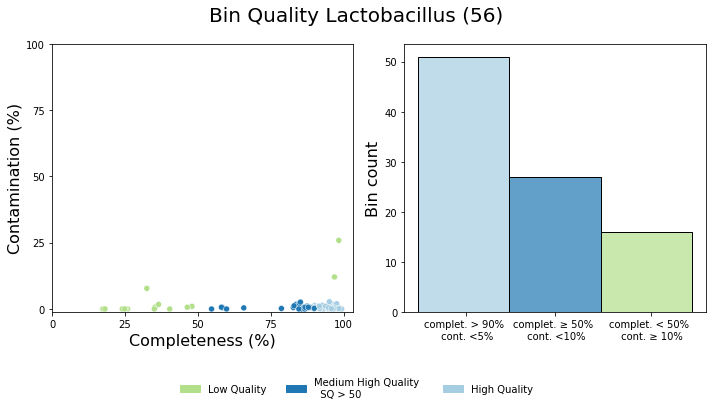

In [184]:
subplot_binQ(df_Lactobacillus_Q, df_Lactobacillus_Q, 'Lactobacillus (56)', nrOfclasses=3, paletteName="Paired")

In [185]:
df_Alistipes_Q.groupby('bin_class').count()

,Bin_Id,classification,closest_placement_taxonomy,msa_percent,Domain,Phylum,Class,Order,Family,Genus,...,0,1,2,3,4,5+,Completeness,Contamination,Strain heterogeneity,class_3
bin_class,,,,,,,,,,,,,,,,,,,,,
0,57,57,55,57,57,57,57,57,57,57,...,57,57,57,57,57,57,57,57,57,57
1,11,11,10,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
3,25,25,20,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,25


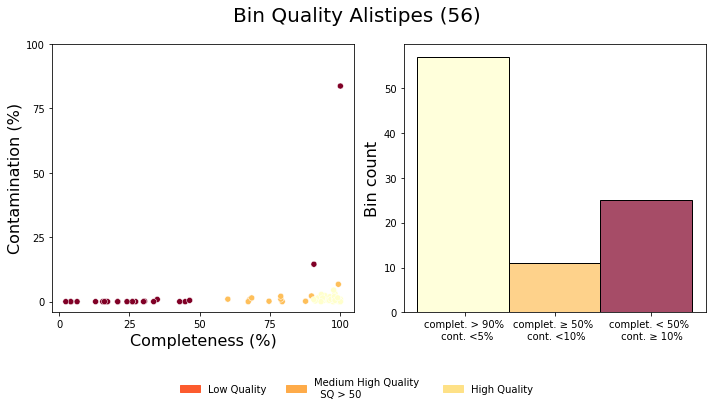

In [220]:
subplot_binQ(df_Alistipes_Q, df_Alistipes_Q, 'Alistipes (56)', nrOfclasses=3, paletteName="YlOrRd")

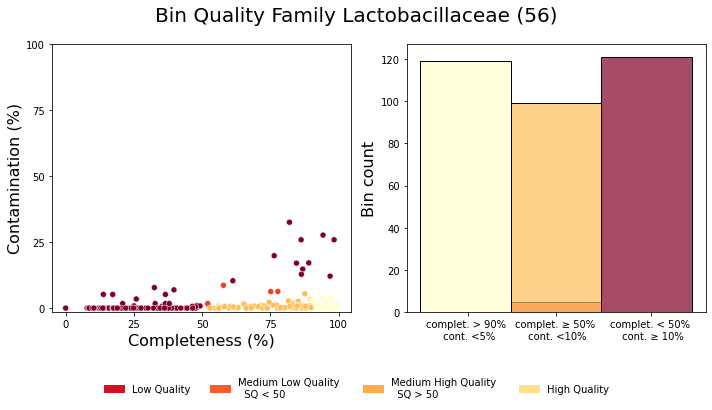

In [219]:
subplot_binQ(df_Lactobacillaceae_Q, df_Lactobacillaceae_Q, 'Family Lactobacillaceae (56)', nrOfclasses=4, paletteName="YlOrRd")

In [137]:
df_Lactobacillaceae_Q.groupby('bin_class').count()

,Bin_Id,classification,closest_placement_taxonomy,msa_percent,Domain,Phylum,Class,Order,Family,Genus,...,0,1,2,3,4,5+,Completeness,Contamination,Strain heterogeneity,class_3
bin_class,,,,,,,,,,,,,,,,,,,,,
0,119,119,108,119,119,119,119,119,119,119,...,119,119,119,119,119,119,119,119,119,119
1,99,99,96,99,99,99,99,99,99,99,...,99,99,99,99,99,99,99,99,99,99
2,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,121,121,113,121,121,121,121,121,121,121,...,121,121,121,121,121,121,121,121,121,121


In [192]:
df_NCBI_Lactobacillus_Q.groupby('bin_class').count()

,Bin_Id,classification,closest_placement_taxonomy,msa_percent,Domain,Phylum,Class,Order,Family,Genus,...,0,1,2,3,4,5+,Completeness,Contamination,Strain heterogeneity,class_3
bin_class,,,,,,,,,,,,,,,,,,,,,
0,116,116,105,116,116,116,116,116,116,116,...,116,116,116,116,116,116,116,116,116,116
1,94,94,91,94,94,94,94,94,94,94,...,94,94,94,94,94,94,94,94,94,94
2,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
3,118,118,110,118,118,118,118,118,118,118,...,118,118,118,118,118,118,118,118,118,118


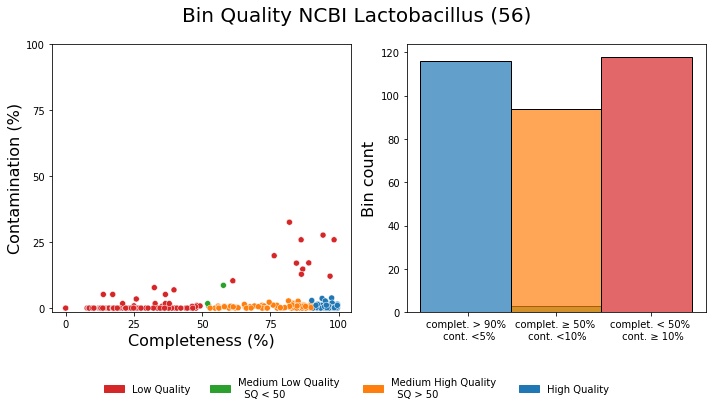

In [193]:

subplot_binQ(df_NCBI_Lactobacillus_Q, df_NCBI_Lactobacillus_Q, 'NCBI Lactobacillus (56)', nrOfclasses=4, paletteName="tab10")


### Saving high Quality bins

In [221]:
df_Lactobacillus_Q[df_Lactobacillus_Q['bin_class'] == 0].to_csv('data56_related_files/HighQLactobacillus', index =False)
df_Alistipes_Q[df_Alistipes_Q['bin_class'] == 0].to_csv('data56_related_files/HighQAlistipes', index = False)
df_Lactobacillaceae_Q[df_Lactobacillaceae_Q['bin_class'] == 0].to_csv('data56_related_files/HighQLActobacillaceae', index = False)
df_NCBI_Lactobacillus_Q[df_NCBI_Lactobacillus_Q['bin_class'] == 0].to_csv('data56_related_files/HighQ_NCBI_Lactobacillus', index = False)